In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### loading data

In [2]:
data=pd.read_csv("loan_dataa.csv",delimiter=';')
#pd.set_option('display.max_rows',None)
data.head(5)

,id,issue_d,loan_amnt,loan_status,funded_amnt,term,int_rate,installment,grade,sub_grade,verification_status,url,addr_state,total_pymnt
0,48010226,May-15,35000.0,Current,35000.0,36 months,13.33,1184.86,C,C3,Verified,https://www.lendingclub.com/browse/loanDetail....,CA,9452.96
1,57693261,NaN,30000.0,Current,30000.0,36 months,þëè.89,938.57,A,A5,Source Verified,https://www.lendingclub.com/browse/loanDetail....,NY,4679.70
2,59432726,Sep-15,15000.0,Current,15000.0,36 months,íîå.53,494.86,B,B5,Verified,https://www.lendingclub.com/browse/loanDetail....,PA,1969.83
3,53222800,Jul-15,9600.0,Current,9600.0,36 months,þëè.89,300.35,A,A5,Not Verified,https://www.lendingclub.com/browse/loanDetail....,OH,1793.68
4,57803010,Aug-15,8075.0,Current,8075.0,36 months,19.19,296.78,NaN,E3,Source Verified,https://www.lendingclub.com/browse/loanDetail....,TX,1178.51


#### describing data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   issue_d              9500 non-null   object 
 2   loan_amnt            9500 non-null   float64
 3   loan_status          9500 non-null   object 
 4   funded_amnt          9500 non-null   float64
 5   term                 9500 non-null   object 
 6   int_rate             9500 non-null   object 
 7   installment          9500 non-null   object 
 8   grade                9485 non-null   object 
 9   sub_grade            9486 non-null   object 
 10  verification_status  9500 non-null   object 
 11  url                  10000 non-null  object 
 12  addr_state           9500 non-null   object 
 13  total_pymnt          9500 non-null   float64
dtypes: float64(3), int64(1), object(10)
memory usage: 1.1+ MB


In [4]:
data.describe()

,id,loan_amnt,funded_amnt,total_pymnt
count,1.000000e+04,9500.000000,9500.000000,9500.000000
mean,5.401581e+07,15273.463158,15311.042105,3143.850941
std,9.416985e+06,8527.234720,8531.989496,4222.351754
min,3.733320e+05,1000.000000,1000.000000,0.000000
25%,4.628504e+07,8743.750000,8800.000000,889.592500
50%,5.542314e+07,14000.000000,14000.000000,1973.705000
75%,6.184264e+07,20000.000000,20000.000000,3765.250000
max,6.861652e+07,35000.000000,35000.000000,41913.620000


In [5]:
data_backup=data.copy()

#### preprocessing :

#### Issue_d column : 

In [6]:
data['issue_d'].unique()

array(['May-15', nan, 'Sep-15', 'Jul-15', 'Aug-15', 'Oct-15', 'Apr-15',
       'Nov-15', 'Jan-15', 'Jun-15', 'Mar-15', 'Dec-15', 'Feb-15'],
      dtype=object)

In [7]:
data['issue_d']=data['issue_d'].str.strip('-15')
data['issue_d'].unique()

array(['May', nan, 'Sep', 'Jul', 'Aug', 'Oct', 'Apr', 'Nov', 'Jan', 'Jun',
       'Mar', 'Dec', 'Feb'], dtype=object)

In [8]:
data=data.rename(columns={'issue_d':'issue_month'})

In [9]:
pd.set_option('display.max_rows',5)

In [10]:
data

,id,issue_month,loan_amnt,loan_status,funded_amnt,term,int_rate,installment,grade,sub_grade,verification_status,url,addr_state,total_pymnt
0,48010226,May,35000.0,Current,35000.0,36 months,13.33,1184.86,C,C3,Verified,https://www.lendingclub.com/browse/loanDetail....,CA,9452.96
1,57693261,NaN,30000.0,Current,30000.0,36 months,þëè.89,938.57,A,A5,Source Verified,https://www.lendingclub.com/browse/loanDetail....,NY,4679.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9998,46154151,Apr,NaN,Current,10000.0,36 months,16.55,354.3,D,D2,Source Verified,https://www.lendingclub.com/browse/loanDetail....,OH,3199.40
9999,66055249,Dec,10000.0,Current,10000.0,36 months,þëè.26,309.97,A,A4,NaN,https://www.lendingclub.com/browse/loanDetail....,IL,301.90


In [11]:
months={'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,
        'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}

In [12]:
# Replacing months with numbers , also filling nan values with 0 instead !

In [13]:
data['issue_month']=data['issue_month'].apply(lambda x:months[x] if x in months.keys() else 0)

In [14]:
data['issue_month'].unique()

array([ 5,  0,  9,  7,  8, 10,  4, 11,  1,  6,  3, 12,  2], dtype=int64)

In [15]:
data

,id,issue_month,loan_amnt,loan_status,funded_amnt,term,int_rate,installment,grade,sub_grade,verification_status,url,addr_state,total_pymnt
0,48010226,5,35000.0,Current,35000.0,36 months,13.33,1184.86,C,C3,Verified,https://www.lendingclub.com/browse/loanDetail....,CA,9452.96
1,57693261,0,30000.0,Current,30000.0,36 months,þëè.89,938.57,A,A5,Source Verified,https://www.lendingclub.com/browse/loanDetail....,NY,4679.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9998,46154151,4,NaN,Current,10000.0,36 months,16.55,354.3,D,D2,Source Verified,https://www.lendingclub.com/browse/loanDetail....,OH,3199.40
9999,66055249,12,10000.0,Current,10000.0,36 months,þëè.26,309.97,A,A4,NaN,https://www.lendingclub.com/browse/loanDetail....,IL,301.90


In [16]:
import seaborn as sns
sns.set()

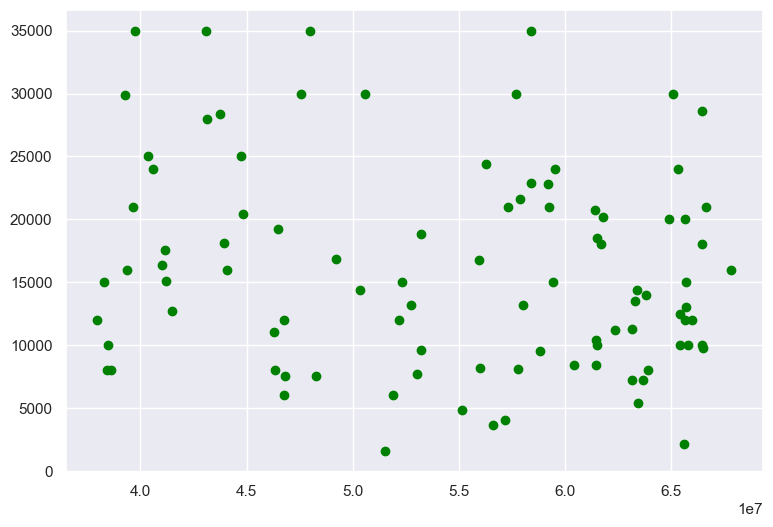

In [17]:
plt.figure(figsize=(9,6))
plt.scatter(data['id'][:100],data['loan_amnt'][:100],color='green')
plt.title("")
plt.show()

#### Loan_amount

In [18]:
pd.set_option('display.max_rows',10)

In [19]:
pd.options.display.float_format = '{:.0f}'.format

In [20]:
#Filling nan Values with the median of the data-set ,
# Since we have some outliers present in the dataset
data.describe()

,id,issue_month,loan_amnt,funded_amnt,total_pymnt
count,10000,10000,9500,9500,9500
mean,54015809,7,15273,15311,3144
std,9416985,4,8527,8532,4222
min,373332,0,1000,1000,0
25%,46285036,4,8744,8800,890
50%,55423144,7,14000,14000,1974
75%,61842636,10,20000,20000,3765
max,68616519,12,35000,35000,41914


In [21]:
data['loan_amnt']=data['loan_amnt'].fillna(int(pd.DataFrame.median(data['loan_amnt'])))

In [22]:
data['loan_amnt'].isna().sum()

0

#### Loan_status

###### Will Replace this clumn with dummy variable { Good status :1  -- Bad status : 0 }

In [23]:
pd.set_option('display.max_rows',5)

In [24]:
data

,id,issue_month,loan_amnt,loan_status,funded_amnt,term,int_rate,installment,grade,sub_grade,verification_status,url,addr_state,total_pymnt
0,48010226,5,35000,Current,35000,36 months,13.33,1184.86,C,C3,Verified,https://www.lendingclub.com/browse/loanDetail....,CA,9453
1,57693261,0,30000,Current,30000,36 months,þëè.89,938.57,A,A5,Source Verified,https://www.lendingclub.com/browse/loanDetail....,NY,4680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9998,46154151,4,14000,Current,10000,36 months,16.55,354.3,D,D2,Source Verified,https://www.lendingclub.com/browse/loanDetail....,OH,3199
9999,66055249,12,10000,Current,10000,36 months,þëè.26,309.97,A,A4,NaN,https://www.lendingclub.com/browse/loanDetail....,IL,302


In [25]:
data['loan_status'].unique()

array(['Current', 'Late (31-120 days)', nan, 'Fully Paid', 'Issued',
       'In Grace Period', 'Late (16-30 days)', 'Charged Off', 'Default'],
      dtype=object)

In [26]:
issued=['Current','Fully Paid','Issued','In Grace Period','Late (16-30 days)']

In [27]:
data['loan_status']=data['loan_status'].apply(lambda x:1 if x in issued else 0)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   issue_month          10000 non-null  int64  
 2   loan_amnt            10000 non-null  float64
 3   loan_status          10000 non-null  int64  
 4   funded_amnt          9500 non-null   float64
 5   term                 9500 non-null   object 
 6   int_rate             9500 non-null   object 
 7   installment          9500 non-null   object 
 8   grade                9485 non-null   object 
 9   sub_grade            9486 non-null   object 
 10  verification_status  9500 non-null   object 
 11  url                  10000 non-null  object 
 12  addr_state           9500 non-null   object 
 13  total_pymnt          9500 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 1.1+ MB


#### Funded_amnt

##### Filling up nan values with the median again , outliers preset in the data

In [29]:
pd.set_option('display.max_rows',8)

In [30]:
data.describe()

,id,issue_month,loan_amnt,loan_status,funded_amnt,total_pymnt
count,10000,10000,10000,10000,9500,9500
mean,54015809,7,15210,1,15311,3144
std,9416985,4,8316,0,8532,4222
min,373332,0,1000,0,1000,0
25%,46285036,4,9000,1,8800,890
50%,55423144,7,14000,1,14000,1974
75%,61842636,10,20000,1,20000,3765
max,68616519,12,35000,1,35000,41914


In [31]:
data['funded_amnt']=data['funded_amnt'].fillna(pd.DataFrame.median(data['funded_amnt']))

### Term

##### Will strip months , fillnan with the worst case 60 months , and change the column name

In [32]:
data.head()

,id,issue_month,loan_amnt,loan_status,funded_amnt,term,int_rate,installment,grade,sub_grade,verification_status,url,addr_state,total_pymnt
0,48010226,5,35000,1,35000,36 months,13.33,1184.86,C,C3,Verified,https://www.lendingclub.com/browse/loanDetail....,CA,9453
1,57693261,0,30000,1,30000,36 months,þëè.89,938.57,A,A5,Source Verified,https://www.lendingclub.com/browse/loanDetail....,NY,4680
2,59432726,9,15000,1,15000,36 months,íîå.53,494.86,B,B5,Verified,https://www.lendingclub.com/browse/loanDetail....,PA,1970
3,53222800,7,9600,1,9600,36 months,þëè.89,300.35,A,A5,Not Verified,https://www.lendingclub.com/browse/loanDetail....,OH,1794
4,57803010,8,8075,1,8075,36 months,19.19,296.78,NaN,E3,Source Verified,https://www.lendingclub.com/browse/loanDetail....,TX,1179


In [33]:
data['term'].unique()

array([' 36 months', ' 60 months', nan], dtype=object)

In [34]:
#Renaming :

In [35]:
data=data.rename(columns={'term':'monthly_term'})

In [36]:
# Striping -months:
data['monthly_term']=data['monthly_term'].str.strip(' months')

In [37]:
data['monthly_term'].unique()

array(['36', '60', nan], dtype=object)

In [38]:
#filling nan , and changing col type to int:
data['monthly_term']=data['monthly_term'].fillna('60')
data['monthly_term']=data['monthly_term'].astype('int64')

#### Interest Rate

Since we have weird values in our data ''unkown format'' we can keep those who are readable and dispose of the others , filling them with the meadian or mean later on !

In [39]:
pd.set_option('display.max_rows',None)

##### remaping unreadable values to 0

In [40]:
temp=data['int_rate']

In [41]:
def readable(x):
    z=False
    try:
        z=x==str(float(x))
    except Exception :
        z=False
    return z

In [42]:
temp=temp.apply(lambda x:x if readable(x) else 0)

In [43]:
data['int_rate']=temp

In [44]:
pd.set_option('display.max_rows',10)

In [45]:
data

,id,issue_month,loan_amnt,loan_status,funded_amnt,monthly_term,int_rate,installment,grade,sub_grade,verification_status,url,addr_state,total_pymnt
0,48010226,5,35000,1,35000,36,13.33,1184.86,C,C3,Verified,https://www.lendingclub.com/browse/loanDetail....,CA,9453
1,57693261,0,30000,1,30000,36,0,938.57,A,A5,Source Verified,https://www.lendingclub.com/browse/loanDetail....,NY,4680
2,59432726,9,15000,1,15000,36,0,494.86,B,B5,Verified,https://www.lendingclub.com/browse/loanDetail....,PA,1970
3,53222800,7,9600,1,9600,36,0,300.35,A,A5,Not Verified,https://www.lendingclub.com/browse/loanDetail....,OH,1794
4,57803010,8,8075,1,8075,36,19.19,296.78,NaN,E3,Source Verified,https://www.lendingclub.com/browse/loanDetail....,TX,1179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,42974433,3,18000,1,18000,36,0,565.56,B,B1,Source Verified,https://www.lendingclub.com/browse/loanDetail....,WY,5639
9996,45424654,4,11300,1,11300,36,0,364.57,B,B3,NaN,https://www.lendingclub.com/browse/loanDetail....,OR,3275
9997,50415990,6,10000,1,10000,36,0,NaN,A,A5,Source Verified,https://www.lendingclub.com/browse/loanDetail....,CA,2186
9998,46154151,4,14000,1,10000,36,16.55,354.3,D,D2,Source Verified,https://www.lendingclub.com/browse/loanDetail....,OH,3199


##### Changing values back from 0 to medians

In [46]:
data['int_rate']=data['int_rate'].astype('float64')

In [47]:
temp_list=[]
for i in data['int_rate']:
    if i>0:
        temp_list.append(i)

In [48]:
temp_list=pd.DataFrame(temp_list)

In [49]:
pd.options.display.float_format='{:.2f}'.format

In [50]:
temp_list.describe()

,0
count,3996.00
mean,16.62
std,2.96
min,6.00
25%,13.99
50%,16.24
75%,18.25
max,28.99


In [51]:
median=temp_list.median()[0]

In [52]:
data['int_rate']=data['int_rate'].apply(lambda x:median if x==0 else x)

In [53]:
data

,id,issue_month,loan_amnt,loan_status,funded_amnt,monthly_term,int_rate,installment,grade,sub_grade,verification_status,url,addr_state,total_pymnt
0,48010226,5,35000.00,1,35000.00,36,13.33,1184.86,C,C3,Verified,https://www.lendingclub.com/browse/loanDetail....,CA,9452.96
1,57693261,0,30000.00,1,30000.00,36,16.24,938.57,A,A5,Source Verified,https://www.lendingclub.com/browse/loanDetail....,NY,4679.70
2,59432726,9,15000.00,1,15000.00,36,16.24,494.86,B,B5,Verified,https://www.lendingclub.com/browse/loanDetail....,PA,1969.83
3,53222800,7,9600.00,1,9600.00,36,16.24,300.35,A,A5,Not Verified,https://www.lendingclub.com/browse/loanDetail....,OH,1793.68
4,57803010,8,8075.00,1,8075.00,36,19.19,296.78,NaN,E3,Source Verified,https://www.lendingclub.com/browse/loanDetail....,TX,1178.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,42974433,3,18000.00,1,18000.00,36,16.24,565.56,B,B1,Source Verified,https://www.lendingclub.com/browse/loanDetail....,WY,5639.24
9996,45424654,4,11300.00,1,11300.00,36,16.24,364.57,B,B3,NaN,https://www.lendingclub.com/browse/loanDetail....,OR,3274.86
9997,50415990,6,10000.00,1,10000.00,36,16.24,NaN,A,A5,Source Verified,https://www.lendingclub.com/browse/loanDetail....,CA,2185.64
9998,46154151,4,14000.00,1,10000.00,36,16.55,354.3,D,D2,Source Verified,https://www.lendingclub.com/browse/loanDetail....,OH,3199.40


In [54]:
data.describe()

,id,issue_month,loan_amnt,loan_status,funded_amnt,monthly_term,int_rate,total_pymnt
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,9500.00
mean,54015809.19,6.64,15209.79,0.93,15245.49,44.93,16.39,3143.85
std,9416984.59,3.68,8315.93,0.25,8320.84,11.60,1.88,4222.35
min,373332.00,0.00,1000.00,0.00,1000.00,36.00,6.00,0.00
25%,46285035.75,4.00,9000.00,1.00,9118.75,36.00,16.24,889.59
50%,55423144.00,7.00,14000.00,1.00,14000.00,36.00,16.24,1973.70
75%,61842636.50,10.00,20000.00,1.00,20000.00,60.00,16.24,3765.25
max,68616519.00,12.00,35000.00,1.00,35000.00,60.00,28.99,41913.62


#### Grade/sub_grade

Dropping grade columns , but before that we're checking for possible nan subgrades , 

**'if such exists we fill them up with their parent grade and '-5' ie worst case ,

**'moreover if their parent is also nan , we assign them to 'G-5' , again worst case

In [55]:
data.head(5)

,id,issue_month,loan_amnt,loan_status,funded_amnt,monthly_term,int_rate,installment,grade,sub_grade,verification_status,url,addr_state,total_pymnt
0,48010226,5,35000.00,1,35000.00,36,13.33,1184.86,C,C3,Verified,https://www.lendingclub.com/browse/loanDetail....,CA,9452.96
1,57693261,0,30000.00,1,30000.00,36,16.24,938.57,A,A5,Source Verified,https://www.lendingclub.com/browse/loanDetail....,NY,4679.70
2,59432726,9,15000.00,1,15000.00,36,16.24,494.86,B,B5,Verified,https://www.lendingclub.com/browse/loanDetail....,PA,1969.83
3,53222800,7,9600.00,1,9600.00,36,16.24,300.35,A,A5,Not Verified,https://www.lendingclub.com/browse/loanDetail....,OH,1793.68
4,57803010,8,8075.00,1,8075.00,36,19.19,296.78,NaN,E3,Source Verified,https://www.lendingclub.com/browse/loanDetail....,TX,1178.51


In [56]:
data['grade'].unique()

array(['C', 'A', 'B', nan, 'F', 'D', 'E', 'G'], dtype=object)

In [57]:
data['sub_grade'].unique()

array(['C3', 'A5', 'B5', 'E3', 'C4', 'F4', 'C2', 'D1', 'C1', 'D5', 'E4',
       'A4', 'B2', 'A2', 'D3', nan, 'B4', 'F1', 'E5', 'B1', 'F2', 'D4',
       'B3', 'E2', 'C5', 'D2', 'F3', 'E1', 'A1', 'A3', 'G1', 'G2', 'G5',
       'G3', 'F5', 'G4'], dtype=object)

In [58]:
alfa=data['sub_grade']

In [59]:
def return_parent(i):
    if pd.isnull(data['grade'][i]):
        return 'G-5'
    else :
        return data['grade'][i]+'-5'

In [60]:
for i,j in enumerate(data['sub_grade']):
    if pd.isnull(j):
        alfa[i]=return_parent(i)

C:\Users\mmopa\AppData\Local\Temp\ipykernel_6404\909450001.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alfa[i]=return_parent(i)


In [61]:
data['sub_grade']=alfa

In [62]:
data['sub_grade'].isna().sum()

0

In [63]:
data=data.drop('grade',axis=1)

#### Verification status

Setting it to dummy variables

In [64]:
data['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified', nan], dtype=object)

In [65]:
status=['Verified','Source Verified']

In [66]:
data['verification_status']=data['verification_status'].apply(lambda x:1 if x in status else 0)

In [67]:
data['verification_status'].isna().sum()

0

#### URL column 

Will be simplified , ie removing unecessary parts

In [68]:
pd.set_option('display.width',1000)

In [69]:
data['url']=data['url'].apply(lambda x:x.strip('https://www.lendingclub.com/browse/loanDetail.action?loan_='))

In [70]:
data['url']

0       48010226
1       57693261
2       59432726
3       53222800
4       57803010
          ...   
9995    42974433
9996    45424654
9997    50415990
9998    46154151
9999    66055249
Name: url, Length: 10000, dtype: object

### Adress state ,